In [1]:
import warnings
warnings.filterwarnings('ignore')
import glob
from shutil import copyfile
import random
from tqdm import tqdm
random.seed(123)
emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]

In [2]:
observations = glob.glob("source_emotion/*")

In [3]:
# observations

['source_emotion\\S005',
 'source_emotion\\S010',
 'source_emotion\\S011',
 'source_emotion\\S014',
 'source_emotion\\S022',
 'source_emotion\\S026',
 'source_emotion\\S028',
 'source_emotion\\S029',
 'source_emotion\\S032',
 'source_emotion\\S034',
 'source_emotion\\S035',
 'source_emotion\\S037',
 'source_emotion\\S042',
 'source_emotion\\S044',
 'source_emotion\\S045',
 'source_emotion\\S046',
 'source_emotion\\S050',
 'source_emotion\\S051',
 'source_emotion\\S052',
 'source_emotion\\S053',
 'source_emotion\\S054',
 'source_emotion\\S055',
 'source_emotion\\S056',
 'source_emotion\\S057',
 'source_emotion\\S058',
 'source_emotion\\S059',
 'source_emotion\\S060',
 'source_emotion\\S061',
 'source_emotion\\S062',
 'source_emotion\\S063',
 'source_emotion\\S064',
 'source_emotion\\S065',
 'source_emotion\\S066',
 'source_emotion\\S067',
 'source_emotion\\S068',
 'source_emotion\\S069',
 'source_emotion\\S070',
 'source_emotion\\S071',
 'source_emotion\\S072',
 'source_emotion\\S073',


In [23]:
neutral_file_dict={}
for obs in observations:
    
#     print('obs is', obs)
    
    obs_id = str(obs[-4:])
#     print('obs_id is', obs_id)
    
    neutral_file_dict[obs_id]=list()
    emotions_folders = "{0}/*".format(str(obs))
    emotions_sessions =  glob.glob(emotions_folders)
#     print('emotions_sessions is', emotions_sessions)
    
    for each_emotion_session in emotions_sessions:
        emotion_sequence_folder = "{0}/*".format(each_emotion_session)
#         print('emotion_sequence_folder is', emotion_sequence_folder)
        emotion_sequence_files = glob.glob(emotion_sequence_folder)
#         print('emotion_sequence_files is', emotion_sequence_files)
        # if emotion is identifed
        # map the peak frame image to the specified emotion folder in the dataset
        # map the first frame image to the neutral folder in the dataset.
        for emotion_output in emotion_sequence_files:
#             print('emotion_output is', emotion_output)
            
            emotion_seq_no = emotion_output[20:23]
#             print('emotion_seq_no is', emotion_seq_no)
            
            # read the emotion in the file
            file = open(emotion_output, 'r')
#             print('file is', file)
            
            emotion= int(float(file.readline()))
#             print('emotion', emotion)
            
            peak_frame_emotion = sorted(glob.glob("source_images/{0}/{1}/*".format(obs_id,emotion_seq_no)))[-1]
#             print('peak_frame_emotion is', peak_frame_emotion)
            
            first_frame_emotion = sorted(glob.glob("source_images/{0}/{1}/*".format(obs_id,emotion_seq_no)))[0]
#             print('first_frame_emotion is', first_frame_emotion)
            
            
            neutral_file_dict[obs_id].append(first_frame_emotion)
            print('neutral_file_dict is', neutral_file_dict)
            
            
            peak_emotion_img_name = "pre_dataset/{0}/{1}".format(emotions[emotion], peak_frame_emotion[23:])
            print('peak_emotion_img_name is', peak_emotion_img_name)
            
            # now copy peak frame to respective folders in dataset
            copyfile(peak_frame_emotion, peak_emotion_img_name)

emotion_sequence_folder is source_emotion\S005\001/*
emotion_sequence_files is ['source_emotion\\S005\\001\\S005_001_00000011_emotion.txt']
emotion_output is source_emotion\S005\001\S005_001_00000011_emotion.txt
emotion_seq_no is 001
file is <_io.TextIOWrapper name='source_emotion\\S005\\001\\S005_001_00000011_emotion.txt' mode='r' encoding='cp1252'>
emotion 3
peak_frame_emotion is source_images/S005/001\S005_001_00000011.png
first_frame_emotion is source_images/S005/001\S005_001_00000001.png
neutral_file_dict is {'S005': ['source_images/S005/001\\S005_001_00000001.png']}
peak_emotion_img_name is pre_dataset/disgust/S005_001_00000011.png
emotion_sequence_folder is source_emotion\S010\001/*
emotion_sequence_files is []
emotion_sequence_folder is source_emotion\S010\002/*
emotion_sequence_files is ['source_emotion\\S010\\002\\S010_002_00000014_emotion.txt']
emotion_output is source_emotion\S010\002\S010_002_00000014_emotion.txt
emotion_seq_no is 002
file is <_io.TextIOWrapper name='sourc

In [24]:
for key in neutral_file_dict.keys():
    if len(neutral_file_dict[key])>0:
        # randomly copy neutral frames to neutral folder
        source_file = random.choice(neutral_file_dict[key])
        neutral_emotion_img_name = "pre_dataset/neutral/{0}".format(source_file[23:])
        copyfile(source_file, neutral_emotion_img_name)

In [27]:
import cv2
faceDet = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt_tree.xml")

def detect_faces(emotion):
    files = glob.glob("pre_dataset/{0}/*".format(emotion)) #Get list of all images with emotion
    filenumber = 0
    for f in files:
        frame = cv2.imread(f) #Open image
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
        #Detect face using 4 different classifiers
        face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        #Go over detected faces, stop at first detected face, return empty if no face.
        if len(face) == 1:
            facefeatures = face
        elif len(face_two) == 1:
            facefeatures = face_two
        elif len(face_three) == 1:
            facefeatures = face_three
        elif len(face_four) == 1:
            facefeatures = face_four
        else:
            facefeatures = ""
        #Cut and save face
        for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
            gray = gray[y:y+h, x:x+w] #Cut the frame to size
            try:
                out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
                cv2.imwrite("dataset/{0}/{1}.png".format(emotion, filenumber), out) #Write image
            except:
               pass #If error, pass file
        filenumber += 1

In [30]:
for emotion in tqdm(emotions):
    detect_faces(emotion)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:40<00:00, 12.51s/it]


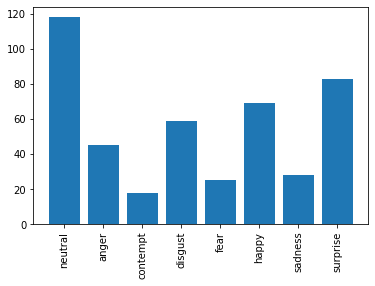

In [31]:
# Visualize the distribution of the dataset
import matplotlib.pyplot as plt                        
%matplotlib inline

image_dict = dict()
for emotion in emotions:
    image_dict[emotion] = len(glob.glob("dataset/{0}/*".format(emotion)))

plt.bar(range(len(image_dict)), list(image_dict.values()), align='center')
plt.xticks(range(len(image_dict)), list(image_dict.keys()), rotation=90)
plt.show()

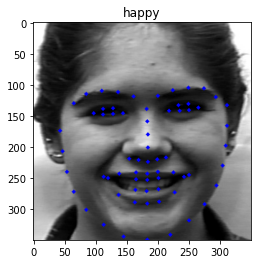

In [33]:
#Import required modules
import cv2
import dlib
#Set up some required objects
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file
frame = cv2.imread("dataset/happy/1.png")
detections = detector(frame, 1) #Detect the faces in the image
for k,d in enumerate(detections):#For each detected face
    shape = predictor(frame, d) #Get coordinates
    for i in range(1,68):#There are 68 landmark points on each face
        cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=3) #For each point, draw a red circle with thickness2 on the original frame
plt.imshow(frame)#Display the frame
plt.title("happy")
plt.show()

Example of shape predictor coordinates without the image

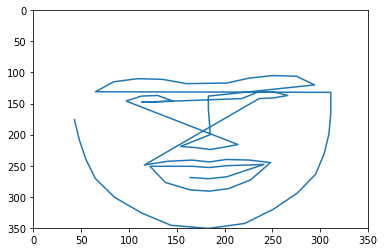

In [34]:
import numpy as np
sample_x = list()
sample_y = list()
detections = detector(frame, 1) #Detect the faces in the image
for k,d in enumerate(detections):#For each detected face
    shape = predictor(frame, d) #Get coordinates
    for i in range(1,68):
        sample_x.append(float(shape.part(i).x))
        sample_y.append(float(shape.part(i).y))
        
plt.plot(sample_x, sample_y)
plt.xlim((0,350))
plt.ylim((0,350))
plt.gca().invert_yaxis()
plt.show()

In [35]:
print(len(sample_x), len(sample_y))

67 67


In [56]:
import math
def get_landmarks(image):
    data={}
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        # calculate the center of gravity
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        # calculate the distance from center from both axis.
        # this information is used to get the angle relative to center point.
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            # append x and y values
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            # calculate the euclidiean distance from center
            dist = np.linalg.norm(coornp-meannp)
            # append the distance to the feature vector
            landmarks_vectorised.append(dist)
            # apend the angle relative to the center of gravity.
            landmarks_vectorised.append(math.degrees(math.atan2(y,x)))
        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1:
        data['landmarks_vestorised'] = "error"
    return data

In [57]:
print(len(get_landmarks(frame)["landmarks_vectorised"]))
print(len(get_landmarks(frame)["landmarks_vectorised"])/4)

268
67.0


In [58]:
# get_landmarks(frame)["landmarks_vectorised"]

In [59]:
print(get_landmarks(frame)["landmarks_vectorised"][0:4])

[43.0, 176.0, 144.52558874070195, -167.10472713369361]


# Train-test split - baseline

## Two helper functions below does the following work

1. get_files to randomly split the data in each emotion folder to training and test files. I have used 80/20 split.
2. make_sets runs across each emotion folder and gets the training and test files from get_files function. It then converts each image to feature using get_landmarks function and tags the file to the emotion label. Thus we have our training_data, training_labels, test_data, test_labels

In [60]:
def get_files(emotion):
    files = glob.glob("dataset/{0}/*".format(emotion))
    random.shuffle(files)
    train = files[:int(len(files)*0.8)] #get first 80% of file list
    test = files[-int(len(files)*0.2):] #get last 20% of file list
    return train, test

In [61]:
def make_sets():
    training_data = []
    training_labels = []
    test_data = []
    test_labels = []
    train_files_list = [] # its a list of dict of trainfiles
    test_files_list = [] 
    for emotion in emotions:
        #print(" working on %s" %emotion)
        train, test = get_files(emotion)
        #Append data to training and prediction list, and generate labels 0-7
        for item in train:
            d = dict()
            d["name"]= item
            d["emotion"] = emotions.index(emotion)
            train_files_list.append(d)
            image = cv2.imread(item) #open image
            data = get_landmarks(image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                training_data.append(data['landmarks_vectorised']) #append image array to training data list
                training_labels.append(emotions.index(emotion))
        for item in test:
            d = dict()
            d["name"]= item
            d["emotion"] = emotions.index(emotion)
            test_files_list.append(d)
            image = cv2.imread(item)
            data = get_landmarks(image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                test_data.append(data['landmarks_vectorised'])
                test_labels.append(emotions.index(emotion))
    return training_data, training_labels, test_data, test_labels, train_files_list, test_files_list


Model Application - Baseline

Calculating the Log loss and Accuracy of this model

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss
clf_lin_svm = SVC(kernel='linear', random_state=7, probability=True, tol=1e-3)
test_trails = []
train_trails = []
train_log_trails = []
test_log_trails = []
for i in tqdm(range(0,10):
    print("Making sets for trail #%s" %i) #Make sets by random sampling 80/20%
    train_data, train_labels, test_data, test_labels, train_files_list, test_files_list = make_sets()
    X_train = np.array(train_data) #Turn the training set into a numpy array for the classifier
    y_train = np.array(train_labels)
    print("training SVM linear for trail #%s" %i) #train SVM
    clf_lin_svm.fit(X_train, y_train)
    print("getting accuracies for trail #%s" %i) #Use score() function to get accuracy
    X_test = np.array(test_data)
    y_test = np.array(test_labels)
    train_accuracy = clf_lin_svm.score(X_train, y_train)
    test_accuracy = clf_lin_svm.score(X_test, y_test)
    print("Train Accuracy Score for trail #{0} = {1} ".format(i, train_accuracy))
    print("Test Accuracy Score for trail #{0} = {1} ".format(i,test_accuracy))
    train_pred_proba_lin = clf_lin_svm.predict_proba(X_train)
    print("Train log loss for trail #{0} = {1}".format(i, log_loss(train_labels, train_pred_proba_lin)))
    test_pred_proba_lin =clf_lin_svm.predict_proba(X_test)
    print("Test log loss for trail #{0} = {1}".format(i,log_loss(test_labels, test_pred_proba_lin)))
    test_trails.append(test_accuracy) #Store accuracy in a list
    train_trails.append(train_accuracy)
    train_log_trails.append(log_loss(train_labels, train_pred_proba_lin))
    test_log_trails.append(log_loss(test_labels, test_pred_proba_lin))
    print("")
print("Mean Train accuracy score: %s" %np.mean(train_trails))
print("Mean Test accuracy score: %s" %np.mean(test_trails)) #Get mean accuracy of the 10 runs
print("Mean Train Log Loss: %s" %np.mean(train_log_trails)) #Get mean accuracy of the 10 runs
print("Mean Test Log Loss: %s" %np.mean(test_log_trails)) #Get mean accuracy of the 10 runs

Making sets for trail #0
training SVM linear for trail #0
getting accuracies for trail #0
Train Accuracy Score for trail #0 = 1.0 
Test Accuracy Score for trail #0 = 0.8 
Train log loss for trail #0 = 0.2827563907138948
Test log loss for trail #0 = 0.6463556504589418

Making sets for trail #1
training SVM linear for trail #1
getting accuracies for trail #1
Train Accuracy Score for trail #1 = 1.0 
Test Accuracy Score for trail #1 = 0.788235294117647 
Train log loss for trail #1 = 0.282827717415266
Test log loss for trail #1 = 0.7091926927187663

Making sets for trail #2
training SVM linear for trail #2
getting accuracies for trail #2
Train Accuracy Score for trail #2 = 1.0 
Test Accuracy Score for trail #2 = 0.8117647058823529 
Train log loss for trail #2 = 0.2997610534855788
Test log loss for trail #2 = 0.614448827052679

Making sets for trail #3
training SVM linear for trail #3
getting accuracies for trail #3
Train Accuracy Score for trail #3 = 1.0 
Test Accuracy Score for trail #3 = 

Comparing with SVM Linear and SVM Polynomial Kernal
The kernel methods in SVM are used when we don't have lineraly seperable data. Kernel methods transform the data to higher dimension to make them seperable. Let's identify if that is the case with our dataset.By default, we have our feature set expressed to a 3 degree polynomial.

Calculating the Log loss and Accuracy of this model

In [63]:
# TODO: Initialize the three models

clf_poly_svm = SVC(kernel="poly", random_state=11, probability=True, tol=1e-3)

test_trails = []
train_trails = []
train_log_trails = []
test_log_trails = []
for i in range(0,10):
    print("Making sets for trail #%s" %i) #Make sets by random sampling 80/20%
    train_data, train_labels, test_data, test_labels, train_files_list, test_files_list = make_sets()
    X_train = np.array(train_data) #Turn the training set into a numpy array for the classifier
    y_train = np.array(train_labels)
    print("training SVM Poly for trail #%s" %i) #train SVM
    clf_poly_svm.fit(X_train, y_train)
    print("getting accuracies for trail #%s" %i) #Use score() function to get accuracy
    X_test = np.array(test_data)
    y_test = np.array(test_labels)
    train_accuracy = clf_poly_svm.score(X_train, y_train)
    test_accuracy = clf_poly_svm.score(X_test, y_test)
    print("Train Accuracy Score for trail #{0} = {1} ".format(i, train_accuracy))
    print("Test Accuracy Score for trail #{0} = {1} ".format(i,test_accuracy))
    train_pred_proba_poly = clf_poly_svm.predict_proba(X_train)
    print("Train log loss for trail #{0} = {1}".format(i, log_loss(train_labels, train_pred_proba_poly)))
    test_pred_proba_poly =clf_poly_svm.predict_proba(X_test)
    print("Test log loss for trail #{0} = {1}".format(i,log_loss(test_labels, test_pred_proba_poly)))
    test_trails.append(test_accuracy) #Store accuracy in a list
    train_trails.append(train_accuracy)
    train_log_trails.append(log_loss(train_labels, train_pred_proba_poly))
    test_log_trails.append(log_loss(test_labels, test_pred_proba_poly))
    print("")
print("Mean Train accuracy score: %s" %np.mean(train_trails))
print("Mean Test accuracy score: %s" %np.mean(test_trails)) #Get mean accuracy of the 10 runs
print("Mean Train Log Loss: %s" %np.mean(train_log_trails)) #Get mean accuracy of the 10 runs
print("Mean Test Log Loss: %s" %np.mean(test_log_trails)) #Get mean accuracy of the 10 runs

Making sets for trail #0
training SVM Poly for trail #0
getting accuracies for trail #0
Train Accuracy Score for trail #0 = 0.6073446327683616 
Test Accuracy Score for trail #0 = 0.611764705882353 
Train log loss for trail #0 = 0.6694732680734549
Test log loss for trail #0 = 0.9226447218890065

Making sets for trail #1
training SVM Poly for trail #1
getting accuracies for trail #1
Train Accuracy Score for trail #1 = 0.6214689265536724 
Test Accuracy Score for trail #1 = 0.5882352941176471 
Train log loss for trail #1 = 0.7394451762841918
Test log loss for trail #1 = 0.8702771151149589

Making sets for trail #2
training SVM Poly for trail #2
getting accuracies for trail #2
Train Accuracy Score for trail #2 = 0.6073446327683616 
Test Accuracy Score for trail #2 = 0.611764705882353 
Train log loss for trail #2 = 0.737484483142572
Test log loss for trail #2 = 0.7799192455974994

Making sets for trail #3
training SVM Poly for trail #3
getting accuracies for trail #3
Train Accuracy Score for


Surprisingly there doesn't seem to be a great difference in the performance of the Polynomial SVM when compared to linear SVM. May be our extracted and enriched feature set caused additional variance and overfitted the training data. We will for now go with the Linear SVM as our baseline and check the confusion matrix.

In [64]:
# taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [65]:
test_pred = clf_lin_svm.predict(test_data)

Normalized confusion matrix


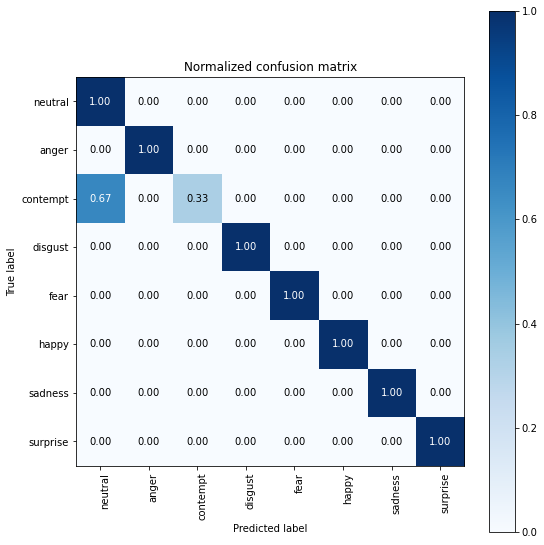

In [66]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, test_pred, classes=emotions, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
import pandas as pd
train_df = pd.DataFrame(train_files_list)
test_df = pd.DataFrame(test_files_list)

In [68]:
np.unique(test_df["emotion"])

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [69]:
test_df.groupby("emotion").size()

emotion
0    23
1     9
2     3
3    11
4     5
5    13
6     5
7    16
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002996553B488>]],
      dtype=object)

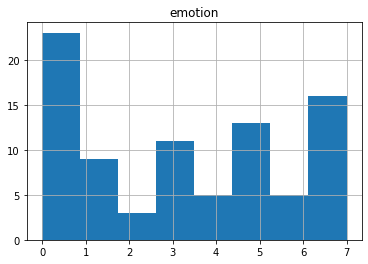

In [70]:
# visualize the distribution of emotions in test set
test_df.hist(column="emotion", bins = len(np.unique(test_df["emotion"])))

In [71]:
test_df["prediction"] = test_pred
# distil all the misclassified images.
miscalssified_df = test_df[test_df["emotion"]!=test_df["prediction"]]
display(miscalssified_df)

,name,emotion,prediction
32,dataset/contempt\3.png,2,0
34,dataset/contempt\10.png,2,0


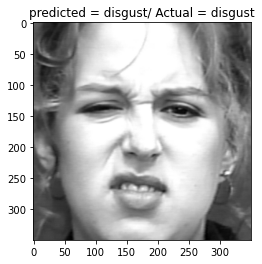

array([0.07, 0.02, 0.01, 0.82, 0.02, 0.01, 0.03, 0.02])

In [72]:
# Showing the misclassified image and its predicted probability

image = cv2.imread("dataset/disgust/9.png")
plt.title("predicted = {0}/ Actual = {1}".format(emotions[clf_lin_svm.predict(test_data)[45]], emotions[test_labels[45]]))
plt.imshow(image)
plt.show()
clf_lin_svm.predict_proba(test_data)[45]